In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [229]:
start = datetime.datetime(2004,12,14)#26 day before start year for make indicator
end = datetime.datetime(2006,1,1)
st=start.strftime("%Y")
ed=end.strftime("%Y")

In [230]:
stock = 'AAPL'
df = web.DataReader(stock,'yahoo',start,end)
# df = df.drop(['Open','High','Low','Volume','Adj Close'],axis=1)
# pd.set_option('display.max_columns', None)

In [231]:
df['MA'] = df['Close'].rolling(15).mean()
df = df.iloc[14:]

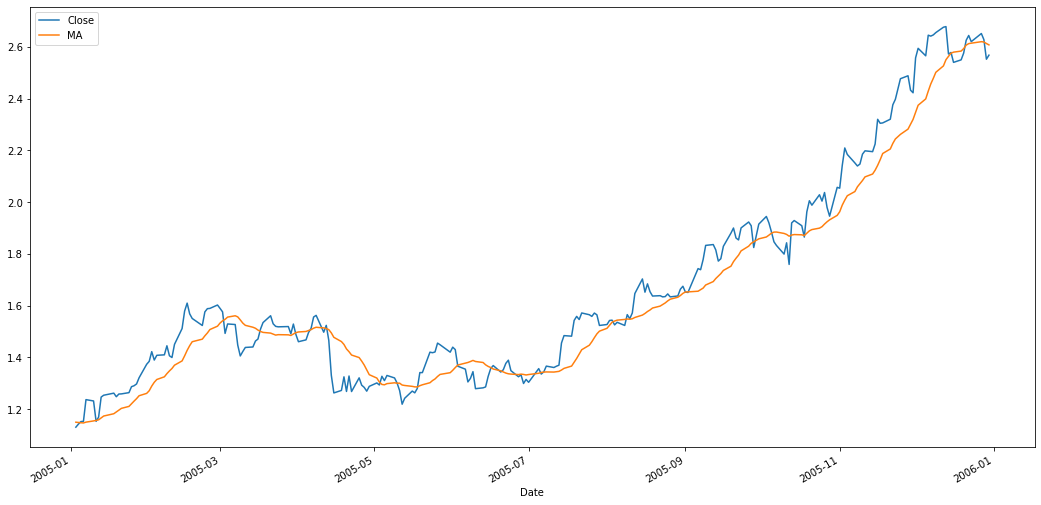

In [232]:
df[['Close','MA']].plot(figsize = (18,9))

In [233]:

df.loc[(df['Close'] > df['MA']) &
((df['Close'] > df['Close'].shift(1)) | (df['MA'] > df['MA'].shift(1))) &
((df['Close'] > df['Close'].shift(2)) | (df['MA'] > df['MA'].shift(2))) &
((df['Close'] > df['Close'].shift(3)) | (df['MA'] > df['MA'].shift(3))) &
((df['Close'] > df['Close'].shift(4)) | (df['MA'] > df['MA'].shift(4))) &
((df['Close'] > df['Close'].shift(5)) | (df['MA'] > df['MA'].shift(5))) , 'Trend'] = 'Up'

df.loc[(df['Close'] < df['MA']) &
((df['Close'] < df['Close'].shift(1)) | (df['MA'] < df['MA'].shift(1))) &
((df['Close'] < df['Close'].shift(2)) | (df['MA'] < df['MA'].shift(2))) &
((df['Close'] < df['Close'].shift(3)) | (df['MA'] < df['MA'].shift(3))) &
((df['Close'] < df['Close'].shift(4)) | (df['MA'] < df['MA'].shift(4))) &
((df['Close'] < df['Close'].shift(5)) | (df['MA'] < df['MA'].shift(5))) , 'Trend'] = 'Down'

In [234]:
# df.loc[(df['Close'] > df['MA']) &
# (df['MA'] > df['MA'].shift(1)) &
# (df['MA'] > df['MA'].shift(2)) &
# (df['MA'] > df['MA'].shift(3)) &
# (df['MA'] > df['MA'].shift(4)) &
# (df['MA'] > df['MA'].shift(5)) , 'Trend'] = 'Up'

# df.loc[(df['Close'] < df['MA']) &
# (df['MA'] < df['MA'].shift(1)) &
# (df['MA'] < df['MA'].shift(2)) &
# (df['MA'] < df['MA'].shift(3)) &
# (df['MA'] < df['MA'].shift(4)) &
# (df['MA'] < df['MA'].shift(5)) , 'Trend'] = 'Down'

In [238]:
df.loc[df['Trend'].isnull(), 'Ntrend'] = df['Trend'].shift(1)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull(),'Ntrend'] = df['Trend'].shift(2)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull(),'Ntrend'] = df['Trend'].shift(3)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
df['Trend'].shift(3).isnull(),'Ntrend'] = df['Trend'].shift(4)
df.loc[df['Trend'].isnull() & df['Trend'].shift(1).isnull() & df['Trend'].shift(2).isnull() & 
df['Trend'].shift(3).isnull() & df['Trend'].shift(4).isnull(),'Ntrend'] = df['Trend'].shift(5)
df.tail(50)

,High,Low,Open,Close,Volume,Adj Close,MA,Trend,Ntrend
Date,,,,,,,,,
2005-10-20,2.017857,1.941071,1.945357,2.005000,1.357762e+09,1.729614,1.888714,Up,NaN
2005-10-21,2.035000,1.977143,2.030000,1.987857,7.967260e+08,1.714826,1.893595,Up,NaN
2005-10-24,2.028214,1.967500,1.973214,2.028214,6.097532e+08,1.749640,1.899191,Up,NaN
2005-10-25,2.030357,1.988929,2.014286,2.003571,4.651276e+08,1.728382,1.904786,Up,NaN
2005-10-26,2.055714,1.997143,2.010000,2.036786,6.315932e+08,1.757035,1.914905,Up,NaN
2005-10-27,2.036071,1.978929,2.035357,1.978929,4.115412e+08,1.707124,1.923738,Up,NaN
2005-10-28,2.015357,1.934643,2.001429,1.945357,7.697872e+08,1.678163,1.931286,Up,NaN
2005-10-31,2.070714,1.955357,1.971429,2.056786,9.408448e+08,1.774287,1.948476,Up,NaN
2005-11-01,2.076429,2.031071,2.044286,2.053571,7.496860e+08,1.771515,1.962548,Up,NaN


In [239]:
df['S1'] = df['Close'].shift(-1)
df['S2'] = df['Close'].shift(-2)
df.loc[df['S1'].isnull(),'S1'] = 0
df.loc[df['S2'].isnull(),'S2'] = 0
df

,High,Low,Open,Close,Volume,Adj Close,MA,Trend,Ntrend,S1,S2
Date,,,,,,,,,,,
2005-01-03,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.974950,1.149393,NaN,NaN,1.141786,1.151786
2005-01-04,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.984962,1.148238,NaN,NaN,1.151786,1.152679
2005-01-05,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.993589,1.147298,NaN,NaN,1.152679,1.236607
2005-01-06,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.994359,1.146452,NaN,NaN,1.236607,1.231429
2005-01-07,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.066760,1.149607,NaN,NaN,1.231429,1.152857
...,...,...,...,...,...,...,...,...,...,...,...
2005-12-23,2.652143,2.617857,2.648929,2.619643,2.298576e+08,2.259836,2.613762,Up,NaN,2.651071,2.627500
2005-12-27,2.685000,2.641071,2.642857,2.651071,5.905900e+08,2.286949,2.619500,Up,NaN,2.627500,2.551786
2005-12-28,2.670000,2.618571,2.659643,2.627500,3.981152e+08,2.266615,2.618357,NaN,Up,2.551786,2.567500


In [245]:
df.loc[(df['Trend'] == 'Up') | (df['Ntrend'] == 'Up'), 'Trading Signal'] = ((abs(df['Close'] - df[['Close','S1','S2']].min(axis = 1)) / 
abs(df[['Close','S1','S2']].max(axis = 1) - df[['Close','S1','S2']].min(axis = 1)))*0.5) + 0.5

df.loc[(df['Trend'] == 'Down') | (df['Ntrend'] == 'Down'), 'Trading Signal'] = ((abs(df['Close'] - df[['Close','S1','S2']].min(axis = 1)) / 
abs(df[['Close','S1','S2']].max(axis = 1) - df[['Close','S1','S2']].min(axis = 1)))*0.5)
df.head(50)

,High,Low,Open,Close,Volume,Adj Close,MA,Trend,Ntrend,S1,S2,Trading Signal
Date,,,,,,,,,,,,
2005-01-03,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.974950,1.149393,NaN,NaN,1.141786,1.151786,NaN
2005-01-04,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.984962,1.148238,NaN,NaN,1.151786,1.152679,NaN
2005-01-05,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.993589,1.147298,NaN,NaN,1.152679,1.236607,NaN
2005-01-06,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.994359,1.146452,NaN,NaN,1.236607,1.231429,NaN
2005-01-07,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.066760,1.149607,NaN,NaN,1.231429,1.152857,NaN
2005-01-10,1.262500,1.212143,1.246964,1.231429,1.725310e+09,1.062293,1.154333,Up,NaN,1.152857,1.168929,1.000000
2005-01-11,1.234821,1.145357,1.218750,1.152857,2.611627e+09,0.994513,1.156524,NaN,Up,1.168929,1.246429,0.500000
2005-01-12,1.176786,1.130357,1.168750,1.168929,1.919702e+09,1.008377,1.158631,Up,NaN,1.246429,1.253571,0.500000
2005-01-13,1.328929,1.245179,1.316250,1.246429,3.164717e+09,1.075233,1.165833,Up,NaN,1.253571,1.261607,0.500000


In [246]:
df.to_csv('stock/'+stock+'.csv')